# Ejercicio 01
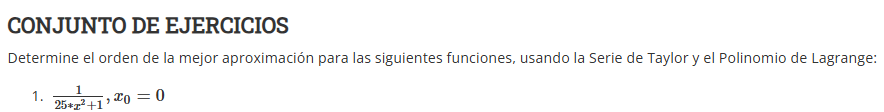

## Inicializacion de los datos

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify
import sympy as sp

# Configuración inicial
a = 1       # Valor de 'a' en la función
x0 = 0      # Punto de expansión para Taylor
h = 0.5     # Distancia entre puntos para Lagrange
x = symbols('x')

In [ ]:
# Función original simbólica
f_expr = 1 / (2 * a * x**2 + 1)

# 1. Aproximación por Serie de Taylor
print("\n=== Aproximación por Serie de Taylor ===")

# Derivadas hasta orden 4
derivatives = [f_expr]
for i in range(1, 5):
    derivatives.append(diff(derivatives[-1], x))

# Evaluar derivadas en x0
derivatives_at_0 = [d.subs(x, x0) for d in derivatives]

# Polinomios de Taylor orden 2 y 4
taylor_terms = [
    derivatives_at_0[0],
    derivatives_at_0[1] * (x - x0),
    derivatives_at_0[2] * (x - x0)**2 / 2,
    derivatives_at_0[3] * (x - x0)**3 / 6,
    derivatives_at_0[4] * (x - x0)**4 / 24
]

taylor_poly = sum(taylor_terms[:3])  # orden 2
taylor_poly_4 = sum(taylor_terms)    # orden 4

print(f"Polinomio de Taylor (orden 2): {taylor_poly}")
print(f"Polinomio de Taylor (orden 4): {taylor_poly_4}")

# Convertir expresiones a funciones numéricas
f_np = lambdify(x, f_expr, 'numpy')
taylor2_np = lambdify(x, taylor_poly, 'numpy')
taylor4_np = lambdify(x, taylor_poly_4, 'numpy')

# 2. Aproximación por Polinomio de Lagrange
print("\n=== Aproximación por Polinomio de Lagrange ===")

# Puntos para Lagrange
points_x = np.array([x0 - h, x0, x0 + h])
points_y = f_np(points_x)





=== Aproximación por Serie de Taylor ===
Polinomio de Taylor (orden 2): 1 - 2*x**2
Polinomio de Taylor (orden 4): 4*x**4 - 2*x**2 + 1

=== Aproximación por Polinomio de Lagrange ===


### Función de interpolación de Lagrange

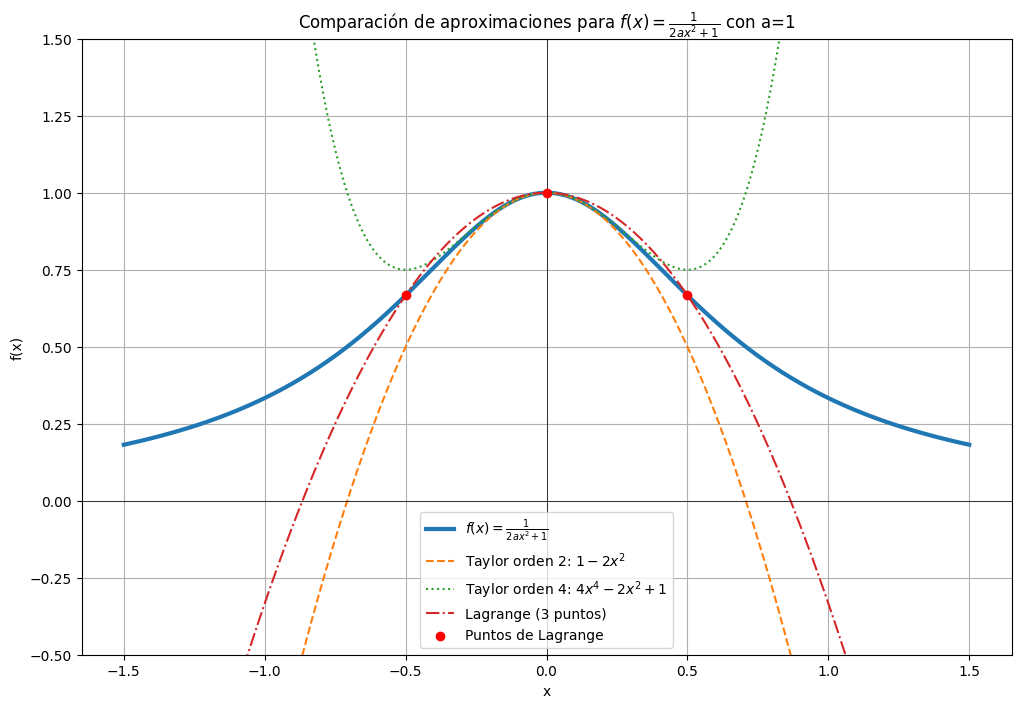


Comparación numérica en puntos seleccionados:
    x |   Original |    Taylor2 |    Taylor4 |   Lagrange
-1.00 |   0.333333 |  -1.000000 |   3.000000 |  -0.333333
-0.50 |   0.666667 |   0.500000 |   0.750000 |   0.666667
 0.00 |   1.000000 |   1.000000 |   1.000000 |   1.000000
 0.50 |   0.666667 |   0.500000 |   0.750000 |   0.666667
 1.00 |   0.333333 |  -1.000000 |   3.000000 |  -0.333333


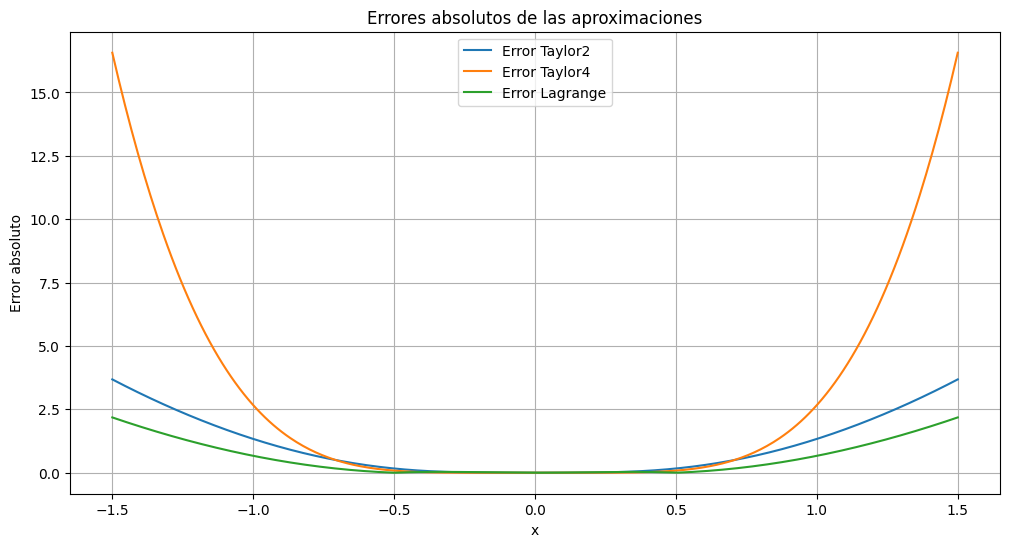

In [11]:
def lagrange_poly(x_val, x_points, y_points):
    n = len(x_points)
    poly = 0
    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if i != j:
                term *= (x_val - x_points[j]) / (x_points[i] - x_points[j])
        poly += term
    return poly

# Crear función vectorizada para evaluar Lagrange
lagrange_np = np.vectorize(lambda val: lagrange_poly(val, points_x, points_y))

# Graficar las funciones y aproximaciones
x_vals = np.linspace(-1.5, 1.5, 400)

plt.figure(figsize=(12, 8))
plt.plot(x_vals, f_np(x_vals), label=r'$f(x) = \frac{1}{2ax^2 + 1}$', linewidth=3)
plt.plot(x_vals, taylor2_np(x_vals), '--', label=f'Taylor orden 2: ${sp.latex(taylor_poly)}$')
plt.plot(x_vals, taylor4_np(x_vals), ':', label=f'Taylor orden 4: ${sp.latex(taylor_poly_4)}$')
plt.plot(x_vals, lagrange_np(x_vals), '-.', label='Lagrange (3 puntos)')
plt.scatter(points_x, points_y, color='red', zorder=5, label='Puntos de Lagrange')

plt.title(f'Comparación de aproximaciones para $f(x) = \\frac{{1}}{{2a x^2 + 1}}$ con a={a}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.ylim(-0.5, 1.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

# Comparación numérica
comparison_x = np.array([-1.0, -0.5, 0, 0.5, 1.0])
print("\nComparación numérica en puntos seleccionados:")
print(f"{'x':>5} | {'Original':>10} | {'Taylor2':>10} | {'Taylor4':>10} | {'Lagrange':>10}")
for xi in comparison_x:
    orig = f_np(xi)
    t2 = taylor2_np(xi)
    t4 = taylor4_np(xi)
    lag = lagrange_np(xi)
    print(f"{xi:5.2f} | {orig:10.6f} | {t2:10.6f} | {t4:10.6f} | {lag:10.6f}")

# Cálculo de errores
errors = {
    'Taylor2': np.abs(f_np(x_vals) - taylor2_np(x_vals)),
    'Taylor4': np.abs(f_np(x_vals) - taylor4_np(x_vals)),
    'Lagrange': np.abs(f_np(x_vals) - lagrange_np(x_vals))
}

plt.figure(figsize=(12, 6))
for method, error in errors.items():
    plt.plot(x_vals, error, label=f'Error {method}')
plt.title('Errores absolutos de las aproximaciones')
plt.xlabel('x')
plt.ylabel('Error absoluto')
plt.legend()
plt.grid(True)
plt.show()